In [15]:
# load and filter osm network (step 1)
import geopandas as gpd
import pandas as pd
import os, sys, time
sys.path.append(os.path.join(r'/Users/jobelanger/GOSTnets-master/GOSTnets'))
import GOSTnets as gn
import networkx as nx
import osmnx as ox
from shapely.ops import unary_union
from shapely.wkt import loads
from shapely.geometry import LineString, MultiLineString, Point

In [16]:
pth = r'/Users/jobelanger/GOSTnets-master/morocco'
# osm pbf last downloaded on: 02.17.20
fil = r'morocco-latest.osm.pbf'
f = os.path.join(pth, 'data', fil)

In [3]:
import load_osm as losm
mar = losm.OSM_to_network(f)

/Applications/anaconda3/envs/gostnets2/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [4]:
mar.roads_raw.infra_type.value_counts()

track             277107
residential       209501
service            40465
path               38441
unclassified       32366
tertiary           20913
footway            17118
living_street      14022
primary            10356
secondary           7917
trunk               4251
pedestrian          3877
motorway_link       1223
motorway            1200
steps               1081
primary_link         894
construction         801
tertiary_link        600
trunk_link           585
secondary_link       500
proposed             117
cycleway              75
bridleway             29
corridor              10
road                   7
raceway                6
escape                 5
bus_guideway           3
crossing               1
services               1
Name: infra_type, dtype: int64

In [9]:
accepted_roadTypes = ['residential', 'unclassified', 'track','service','tertiary','road','secondary','primary','trunk','primary_link','trunk_link','tertiary_link','secondary_link']

In [10]:
mar.filterRoads(acceptedRoads = accepted_roadTypes)

In [11]:
mar.roads_raw.infra_type.value_counts()

track             277107
residential       209501
service            40465
unclassified       32366
tertiary           20913
primary            10356
secondary           7917
trunk               4251
primary_link         894
tertiary_link        600
trunk_link           585
secondary_link       500
road                   7
Name: infra_type, dtype: int64

In [12]:
mar.roads_raw.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
crs = {'init':'epsg:4326'}
mar.roads_raw.to_crs(crs=crs)

,osm_id,infra_type,geometry
0,3997580,tertiary,"LINESTRING (-6.85238 34.00485, -6.85227 34.004..."
1,4004854,tertiary,"LINESTRING (-6.84575 33.99318, -6.84584 33.993..."
2,4004874,secondary,"LINESTRING (-6.82974 33.97342, -6.82982 33.973..."
3,4004875,primary,"LINESTRING (-6.85175 33.98650, -6.85172 33.986..."
4,4005335,tertiary,"LINESTRING (-6.85153 33.98773, -6.85149 33.988..."
...,...,...,...
683431,772695801,service,"LINESTRING (-7.79819 32.24656, -7.79846 32.25025)"
683432,772695802,service,"LINESTRING (-7.80451 32.23725, -7.80453 32.23953)"
683433,772737025,track,"LINESTRING (-4.51418 32.74667, -4.51428 32.746..."
683434,772737026,track,"LINESTRING (-4.51832 32.76632, -4.51805 32.766..."


In [17]:
shp = gpd.read_file(os.path.join(pth, 'data', 'tinghirP.shp'))

In [18]:
shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
mar.roads_raw.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
mar.roads_raw.shape

(605462, 3)

In [24]:
mar.roads_raw.to_crs('epsg:4326')

,osm_id,infra_type,geometry
0,3997580,tertiary,"LINESTRING (-6.85238 34.00485, -6.85227 34.004..."
1,4004854,tertiary,"LINESTRING (-6.84575 33.99318, -6.84584 33.993..."
2,4004874,secondary,"LINESTRING (-6.82974 33.97342, -6.82982 33.973..."
3,4004875,primary,"LINESTRING (-6.85175 33.98650, -6.85172 33.986..."
4,4005335,tertiary,"LINESTRING (-6.85153 33.98773, -6.85149 33.988..."
...,...,...,...
683431,772695801,service,"LINESTRING (-7.79819 32.24656, -7.79846 32.25025)"
683432,772695802,service,"LINESTRING (-7.80451 32.23725, -7.80453 32.23953)"
683433,772737025,track,"LINESTRING (-4.51418 32.74667, -4.51428 32.746..."
683434,772737026,track,"LINESTRING (-4.51832 32.76632, -4.51805 32.766..."


In [31]:
mar.roads_raw.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

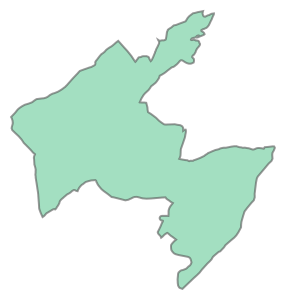

In [20]:
shp_obj = shp.geometry.iloc[0]

shp_obj

In [ ]:
# check source of mar (OSM_to_network object)
mar.crs.source_crs

In [ ]:
# check to see everything lines up by running intersect and counting the True/False returns:
mar.roads_raw.geometry.intersects(shp_obj).value_counts()

In [ ]:
# get only roads in Tinghir and update dataframe object
mar.roads_raw = mar.roads_raw.loc[mar.roads_raw.geometry.intersects(shp_obj) == True]

In [ ]:
# generate GDF of tinghir roads
mar = mar.generateRoadsGDF(verbose=False)

In [ ]:
mar.initialReadIn()

In [ ]:
gn.save(mar.network, 'mar_unclean', os.path.join(pth, 'outputs'))

In [ ]:
# Step 2: Clean Network 
# set the EPSG code for Morocco (MAR).

UTMZs = {'MAR':32629}

# do not adjust. OSM natively comes in ESPG 4326.
WGS = {'init':'epsg:4326'}

# this process can clean multiple networks at once in a loop style
countries = ['MAR']

# adjust to your input filepath:
base_pth = os.path.join(os.path.dirname(os.getcwd()), r'/Users/jobelanger/GOSTnets-master/morocco')
data_pth = os.path.join(base_pth, 'outputs')

for country in countries:
    print('\n--- processing for: %s ---\n' % country)
    print('start: %s\n' % time.ctime())

    print('Outputs can be found at: %s\n' % (data_pth))
        
    UTM = {'init': 'epsg:%d' % UTMZs[country]}
    
    G = nx.read_gpickle(os.path.join(data_pth, 'mar_unclean.pickle'))
    
    G = gn.clean_network(G, data_pth, country, UTM, WGS, 0.5, verbose = False)
    
    nx.write_gpickle(G, os.path.join(data_pth, 'mar_clean.pickle'))
    print('\nend: %s' % time.ctime())
    print('\n--- processing complete for: %s ---' % country)

In [ ]:
print(G)